In [1]:
import seaborn.objects as so
from seaborn import load_dataset
dowjones = load_dataset("dowjones")
fmri = load_dataset("fmri")

The mark draws a connecting line between sorted observations:

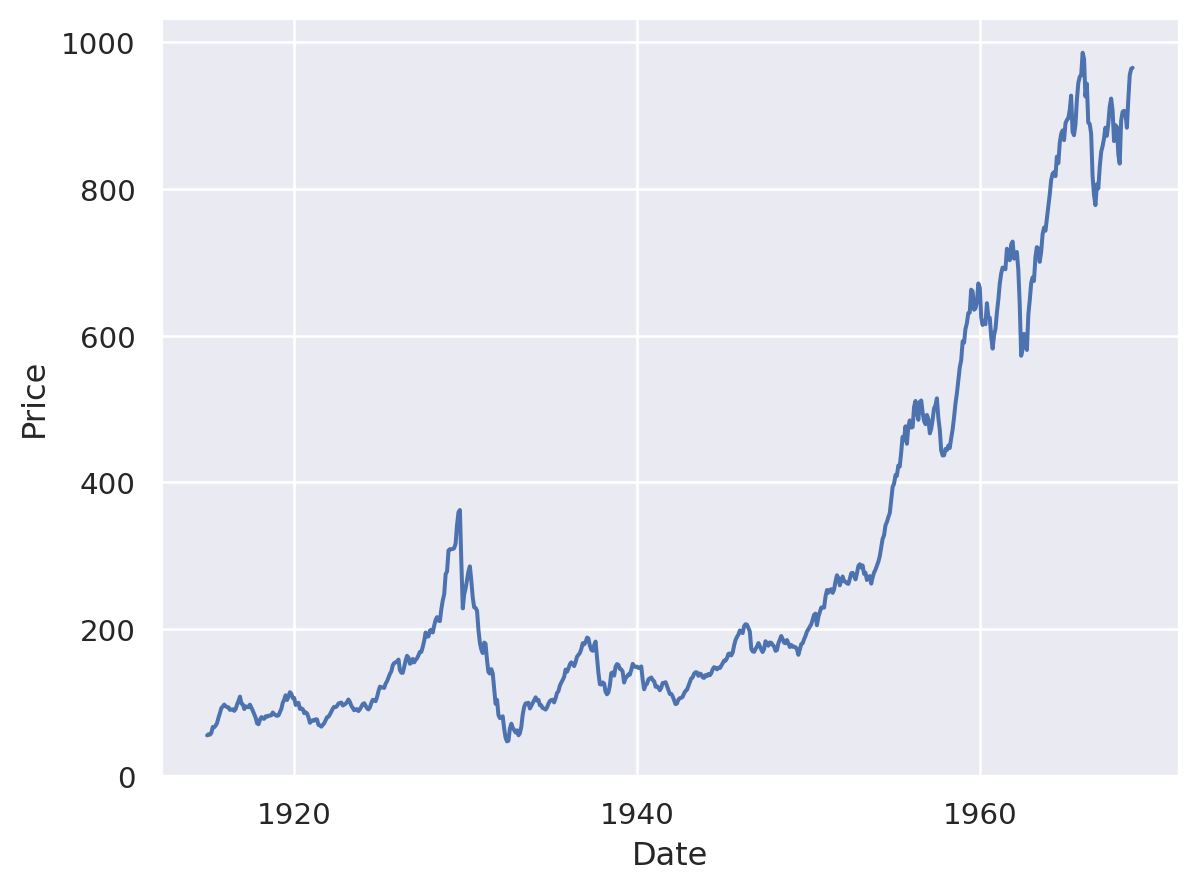

In [2]:
so.Plot(dowjones, "Date", "Price").add(so.Line())

Change the orientation to connect observations along the opposite axis (`orient="y"` is redundant here; the plot would detect that the date variable has a lower orientation priority than the price variable):

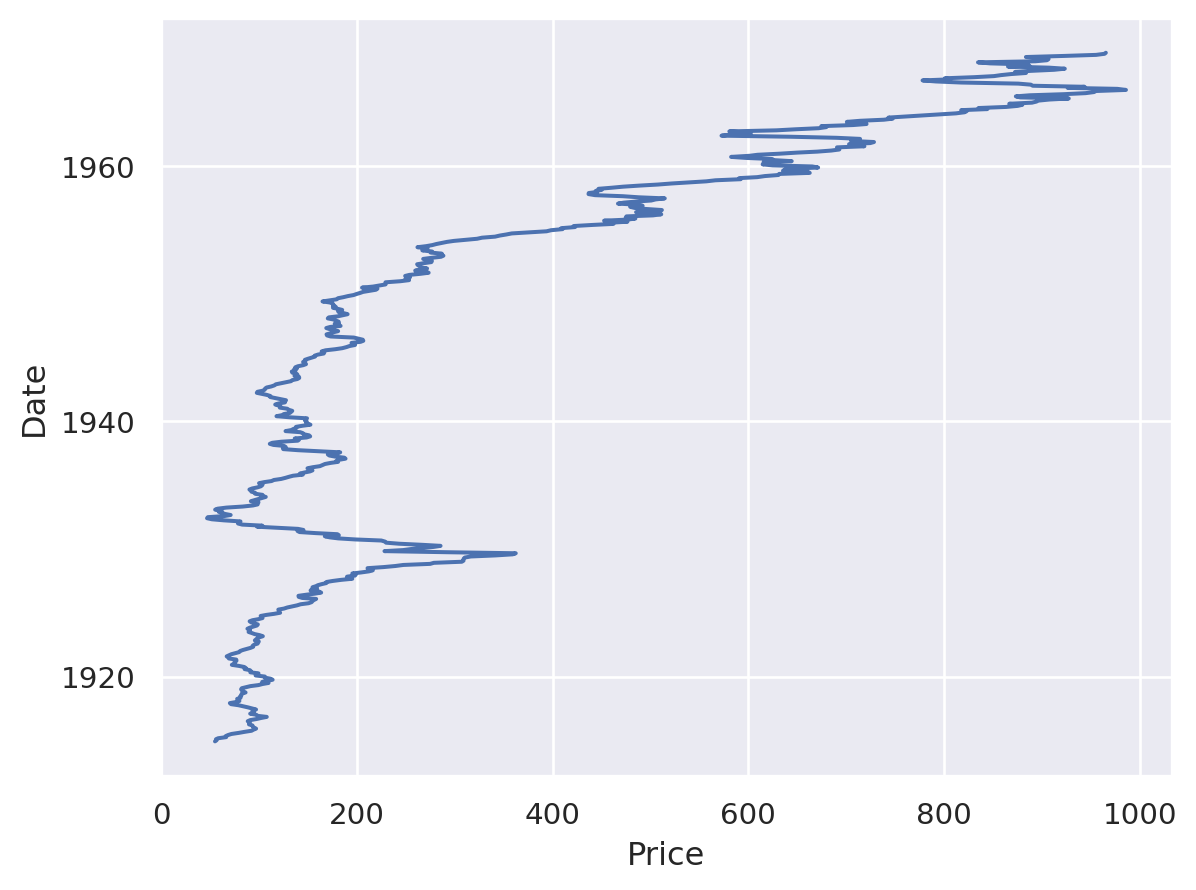

In [3]:
so.Plot(dowjones, x="Price", y="Date").add(so.Line(), orient="y")

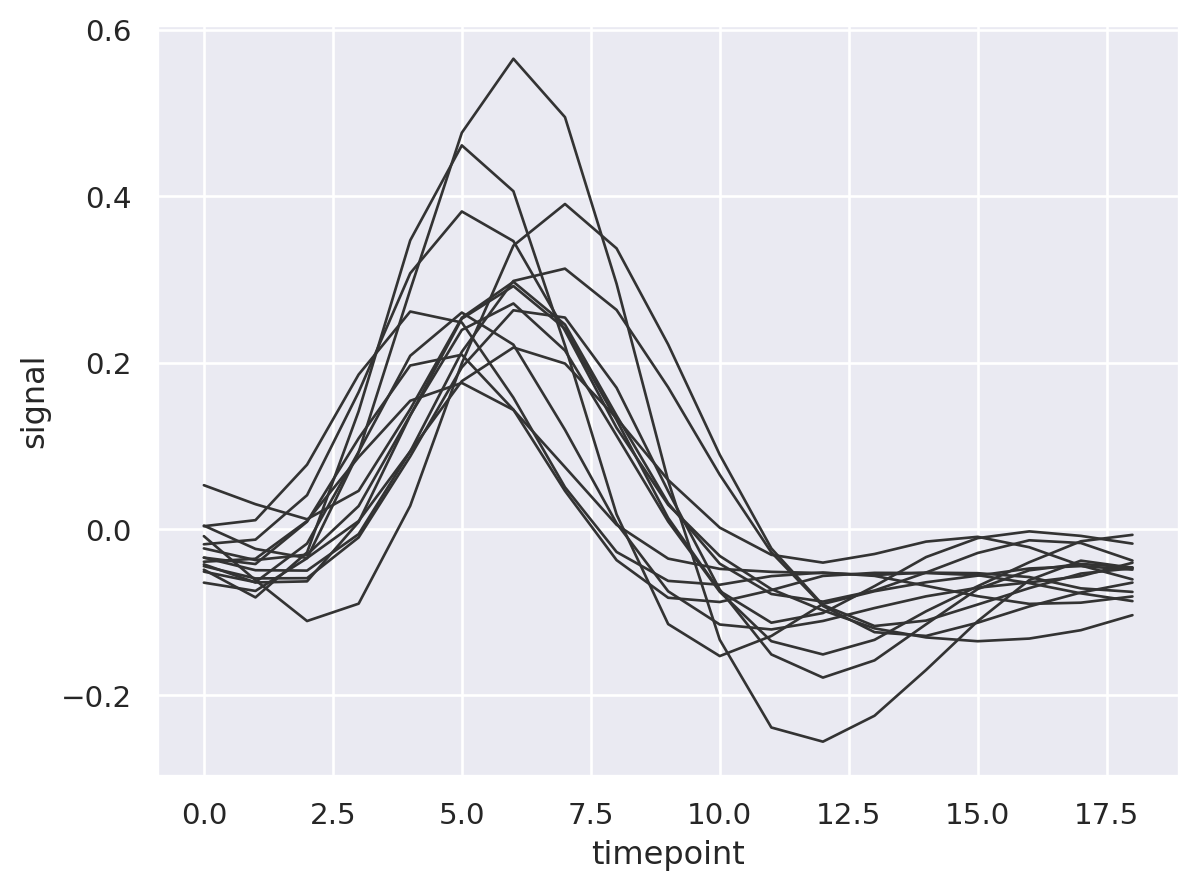

In [4]:
import polars as pl
(
    fmri
    .filter((pl.col("region") == 'parietal') & (pl.col('event') == 'stim'))
    .pipe(so.Plot, "timepoint", "signal")
    .add(so.Line(color=".2", linewidth=1), group="subject")
)

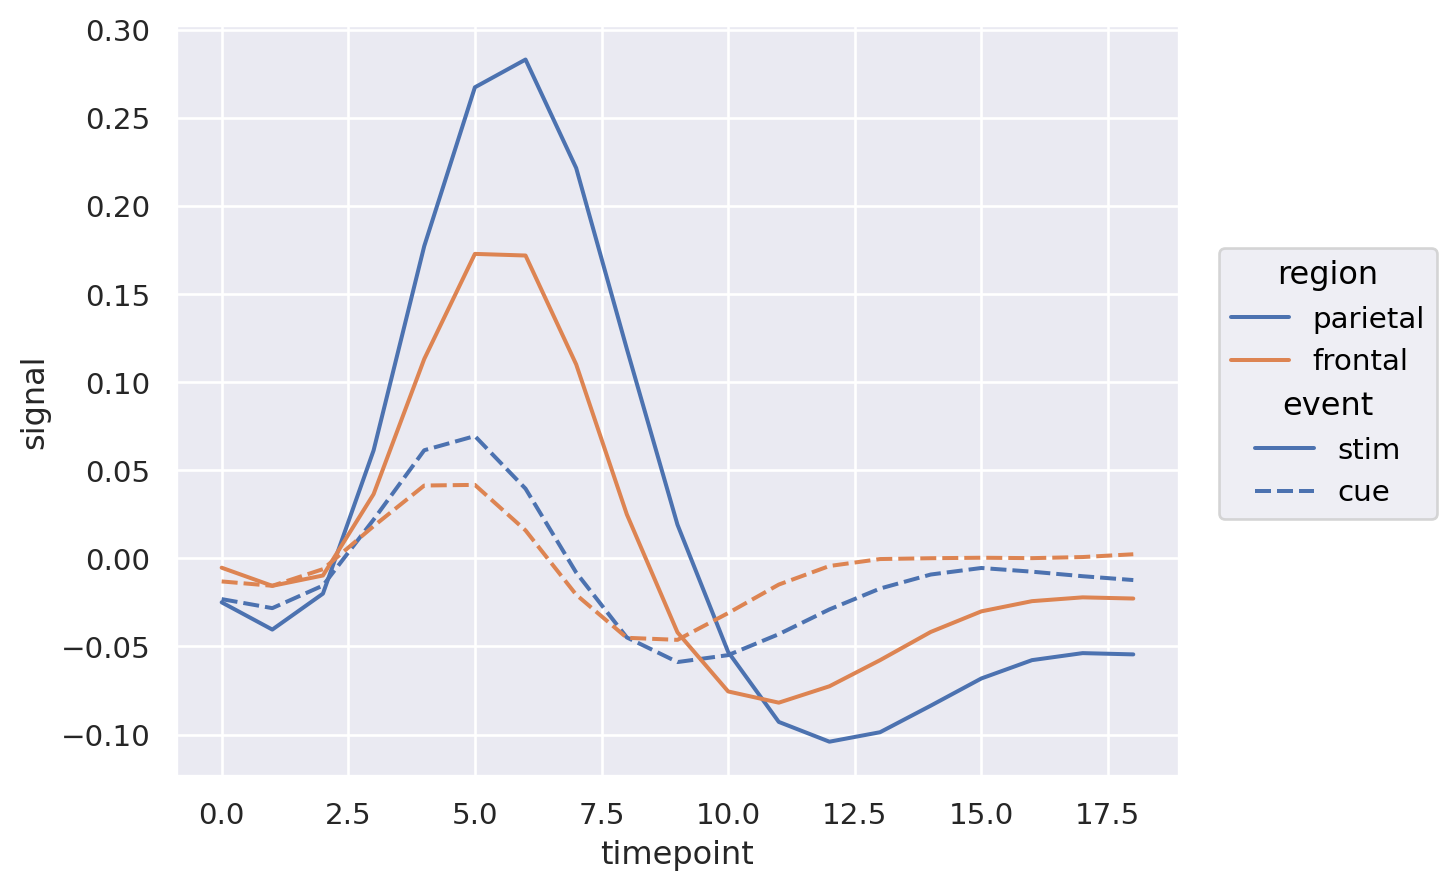

In [5]:
p = so.Plot(fmri, "timepoint", "signal", color="region", linestyle="event")
p.add(so.Line(), so.Agg())

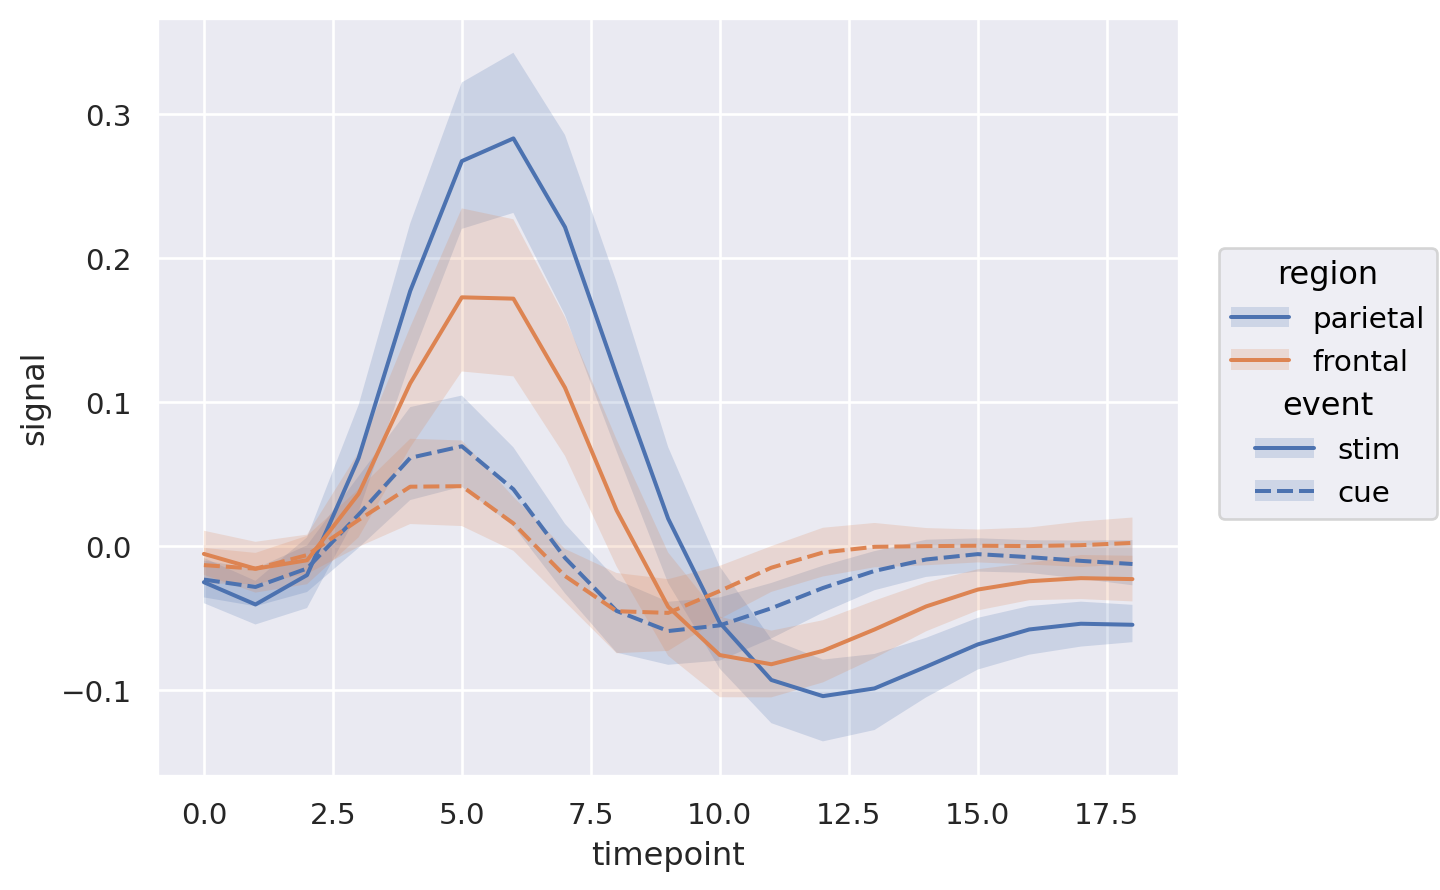

In [6]:
(
    p
    .add(so.Line(), so.Agg())
    .add(so.Band(), so.Est(), group="event")
)

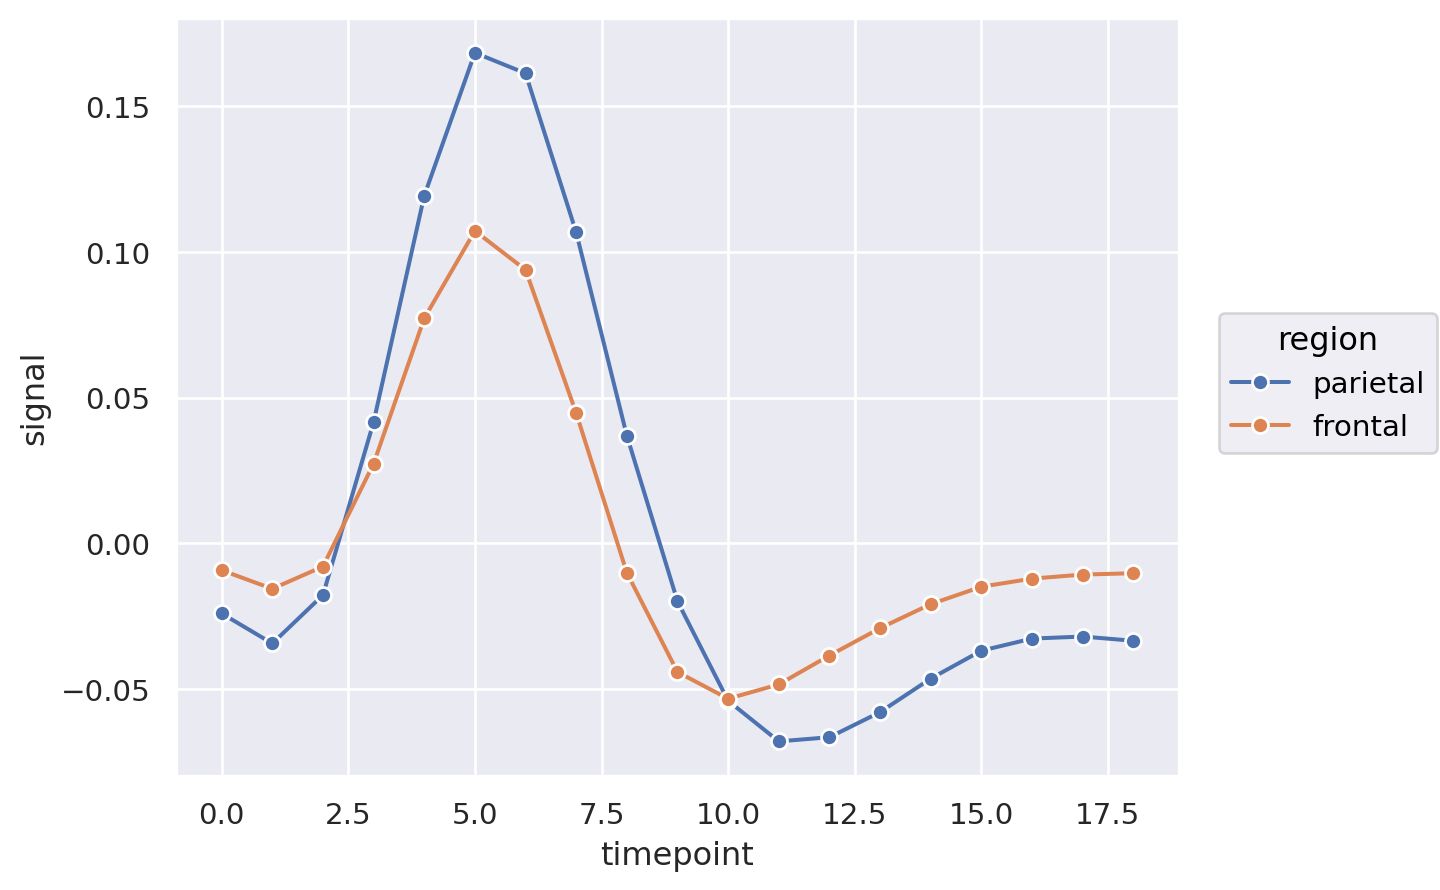

In [7]:
p.add(so.Line(marker="o", edgecolor="w"), so.Agg(), linestyle=None)